In [11]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import sklearn as sk
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

#from keras.preprocessing.text import Tokenizer
#from keras.utils import pad_sequences, to_categorical
#from keras.models import Sequential
#from keras.layers import Embedding, GlobalAveragePooling1D, Conv1D, LSTM, Dense, Bidirectional, Dropout
#from keras import regularizers
from sklearn.metrics import confusion_matrix
import itertools

#import re
#import nltk
#from nltk.stem import PorterStemmer
#nltk.download('stopwords')
#nltk.download('punkt')
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score, classification_report
#from tensorflow.keras.callbacks import EarlyStopping
#import pickle

In [12]:
import pandas as pd
import numpy as np
import openpyxl
import requests
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from datetime import datetime
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


**Modelo 1: Machine Learning Clássico**
Para esta estapa foi escolhido um problema de regressão.

O dataset foi extraído do Kaggle e consiste nos dados do mercado imobiliário de Seattle

**Objetivo**: entender a saúde do mercado de imóveis na cidade de Seattle

Qual é a descrição do problema?

A cidade de Seattle - Washighton- USA possui uma possui uma população aproximada de 260.000 habitantes, onde mais de 60% das moradias foram construídas nos anos de 1960, onde há uma demanda em remodelagem dessas casas que se encontram em não condições de habitação




**Você tem premissas ou hipóteses sobre o problema? Quais?**


Premissa e que a partir da condições de habitação da casa, pode haver uma correlação no aumento de preço de casas em Seattle, devido a diminuição de unidades disponíveis para morar


Não foram colocadas restrições condições  para seleção de dados, por se tratar de um problema que afeta toda a população

A composição do dataset traz informações de identificação de imóveis, preço, zipcodes, especifidades de casas como quantidade de banheiros, quartos e etc.

Além disso, mostra se casa(apartamento) está em condições de habitação ou não é sua classificação.

**Análise e tratamento dos dados**
Os atributos foram analisados um a um de acordo com a descrição fornecida pelo Kaggle, e definidos de acordo com a seguinte lógica:

Numéricos ordinais: float.

Numéricos categóricos: object.

Categóricos: object.

Outro objetivo dessa análise foi identificar os atributos categóricos ordinais para posteriormente transformá-los em números de acordo com sua hierarquia.

In [13]:
# Definindo o dtype das colunas ao carregar o arquivo
dtype = {	'id':int,'date':object,'price':float,'bedrooms':int,'bathrooms':int,'sqft_living':int,'sqft_lot':int,'floors':int,'waterfront':float,'view':float,'condition':object,'grade':float,'sqft_above':object,'sqft_basement':object,'yr_built':object,'yr_renovated':object,'zipcode':object,'lat':int,'long':int,'sqft_living15':int,'sqft_lot15':int}
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/geam-071/mvp_ml/main/Planilha%20sem%20t%C3%ADtulo%20-%20house_sales.csv"
dataset = pd.read_csv(url, names=dtype, skiprows=1, delimiter=',')
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y%m%d')
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,475.112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,477.379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,475.208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,476.168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,476.993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,475.107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,475.944,-122.299,1020,2007
21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,475.345,-122.069,1410,1287


In [14]:

# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/geam-071/mvp_ml/main/Planilha%20sem%20t%C3%ADtulo%20-%20house_sales.csv"

# Informa o cabeçalho das colunas
colunas = ['id','date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y%m%d')
dataset


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,475.112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,477.379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,475.208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,476.168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,476.993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,475.107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,475.944,-122.299,1020,2007
21611,291310100,2015-01-16,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,475.345,-122.069,1410,1287


Foi realizada a separação entre treinamento e teste para aprendizado supervisionado.


Os dados foram normalizados e padronizados para para treinamento, junto com os dados originais no pipeline


Feature selection:

Atributos numéricos:

Utilizaremos o método de cálculo da correlação de pearson. Serão incluídos atributos com correlação em valor absoluto maior que 0.4

Fazendo a correlação de cada uma com a coluna de "Price". Logo, usando as correlações de Pearson, estabelece valores entre duas variáveis numericas, enquanto o valor 1 significa que estão correlatas positivamente, o valor zero, significa nenhuma correlação e o -1, significa uma perfeita correlação inversa

Tratando Possíveis dados nulos para fins de qualidade

In [15]:

nulos_por_coluna = dataset.isnull().sum()
nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]
print(nulos_por_coluna)


Series([], dtype: int64)


In [16]:

corr_cut = 0.25
corr_matrix = dataset.corr()
corr_col1 = corr_matrix['price']
corr_cols_high = list(corr_col1[abs(corr_col1) > corr_cut].index) # Colunas com correlação maior que corr_cut
corr_cols_low = list(corr_col1[abs(corr_col1) <= corr_cut].index) # Colunas com correlação menor ou igual a corr_cut
corr_col1

id              -0.016762
date            -0.004357
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.007104
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

Agora vamos segmentar os atributos com correlação > 0.25

In [17]:
# Cria um novo dataframe com as colunas selecionadas
dataset_tratado = dataset[corr_cols_high]

df_tratado_padronizado = pd.DataFrame(StandardScaler().fit_transform(dataset_tratado), columns=dataset_tratado.columns)
df_tratado_normalizado = pd.DataFrame(MinMaxScaler().fit_transform(dataset_tratado), columns=dataset_tratado.columns)
dataset_tratado

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15
0,221900,3,1.00,1180,1.0,0,0,7,1180,0,1340
1,538000,3,2.25,2570,2.0,0,0,7,2170,400,1690
2,180000,2,1.00,770,1.0,0,0,6,770,0,2720
3,604000,4,3.00,1960,1.0,0,0,7,1050,910,1360
4,510000,3,2.00,1680,1.0,0,0,8,1680,0,1800
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,3.0,0,0,8,1530,0,1530
21609,400000,4,2.50,2310,2.0,0,0,8,2310,0,1830
21610,402101,2,0.75,1020,2.0,0,0,7,1020,0,1020
21611,400000,3,2.50,1600,2.0,0,0,8,1600,0,1410


In [18]:
print("Rechecagem: Total de valores nulos no dataframe final: ", dataset_tratado.isnull().sum().sum())

Rechecagem: Total de valores nulos no dataframe final:  0


Rechecagem: Total de valores nulos no dataframe final:  0

In [19]:

dataset_tratado.shape

(21613, 11)

Após o processamento dos dados ficamos com um dataframe com 21.613 registros

e 11 colunas

In [20]:


# Separar as colunas de entrada (X) e saída (Y)
X = dataset_tratado.drop(['price'], axis=1)  # Colunas de entrada
y = dataset_tratado['price']  # Coluna alvo/saída

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Criando os folds para a validação cruzada
scoring = 'mean_squared_error'
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

**Modelagem**

LR-orig: MSE 53984210148.87 (8018099975.71) - RMSE 232345.02
Ridge-orig: MSE 53997657304.73 (8050648623.35) - RMSE 232373.96
Lasso-orig: MSE 53997766218.79 (8050038840.19) - RMSE 232374.19
KNN-orig: MSE 66268918573.14 (8066461181.24) - RMSE 257427.50
CART-orig: MSE 83183497246.54 (9554190035.70) - RMSE 288415.49
SVM-orig: MSE 140815918262.69 (17596774598.83) - RMSE 375254.47
RF-orig: MSE 45091219852.56 (6644694593.94) - RMSE 212346.93
GB-orig: MSE 43576589839.50 (6775756029.35) - RMSE 208750.07
AB-orig: MSE 71555018146.32 (12464606385.33) - RMSE 267497.70
ET-orig: MSE 46271996353.02 (7074972262.37) - RMSE 215109.27
MLP-orig: MSE 66074715901.15 (8717391226.67) - RMSE 257050.03
LR-padr: MSE 54004282326.13 (8045148409.30) - RMSE 232388.21
Ridge-padr: MSE 53997752527.95 (8050174587.41) - RMSE 232374.16
Lasso-padr: MSE 53997767277.76 (8049954945.33) - RMSE 232374.20
KNN-padr: MSE 48434798507.51 (6291338548.25) - RMSE 220079.07
CART-padr: MSE 84150956885.12 (12454772838.10) - RMSE 290087.84


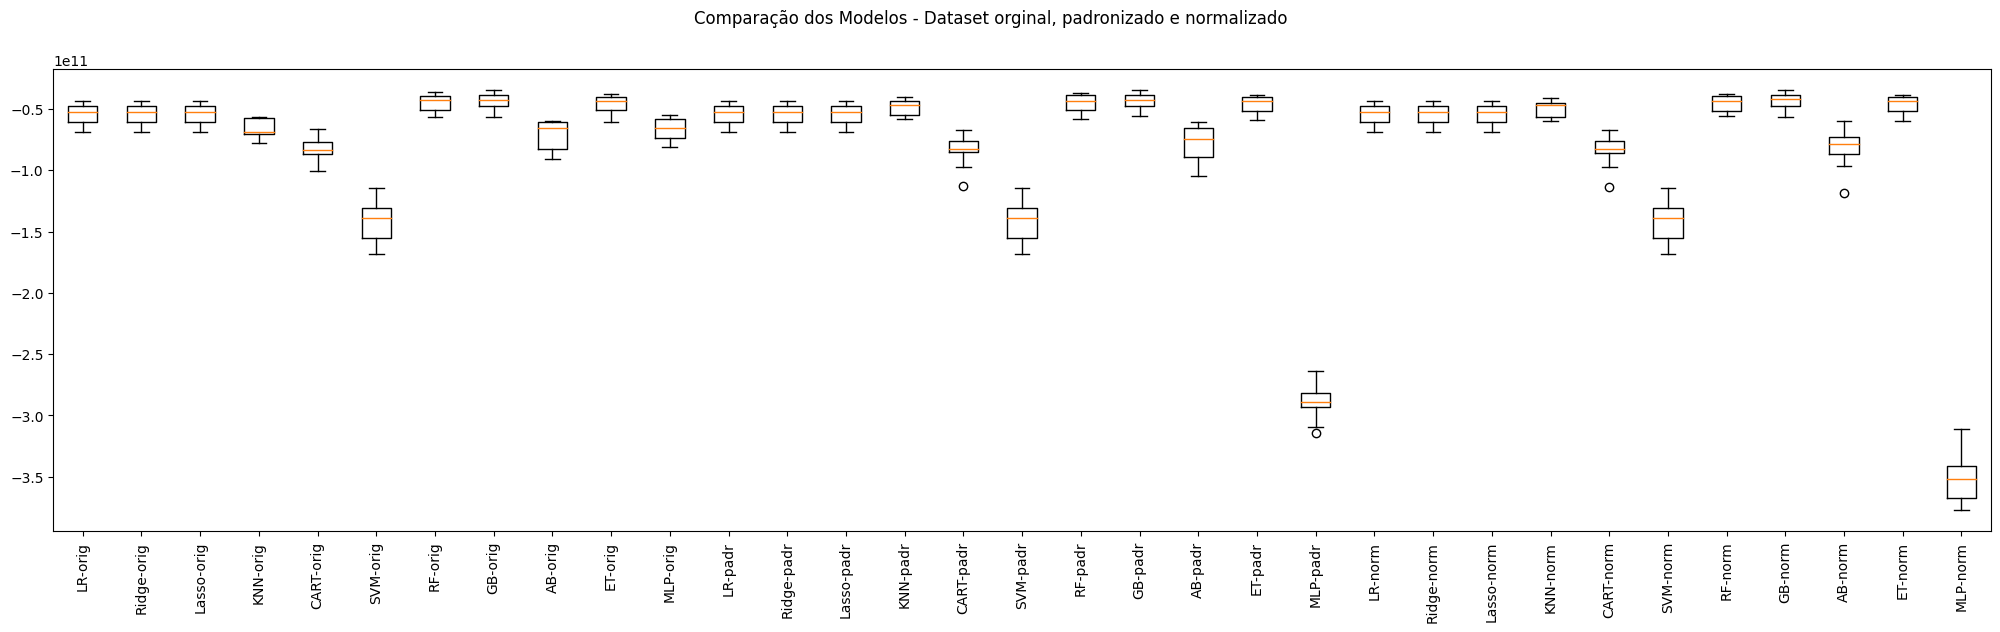

In [21]:
np.random.seed(42) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
lin_reg = ('LR', LinearRegression())
ridge = ('Ridge', Ridge())
lasso = ('Lasso', Lasso())
knn = ('KNN', KNeighborsRegressor())
decision_tree = ('CART', DecisionTreeRegressor())
svr = ('SVM', SVR())
random_forest = ('RF', RandomForestRegressor())
gradient_boost = ('GB', GradientBoostingRegressor())
ada_boost= ('AB', AdaBoostRegressor())
extra_trees= ('ET', ExtraTreesRegressor())
multi_layer_perceptron= ('MLP', MLPRegressor())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([lin_reg])))
pipelines.append(('Ridge-orig', Pipeline([ridge])))
pipelines.append(('Lasso-orig', Pipeline([lasso])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([decision_tree])))
pipelines.append(('SVM-orig', Pipeline([svr])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('GB-orig', Pipeline([gradient_boost])))
pipelines.append(('AB-orig', Pipeline([ada_boost])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('MLP-orig', Pipeline([multi_layer_perceptron])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, lin_reg])))
pipelines.append(('Ridge-padr', Pipeline([standard_scaler, ridge])))
pipelines.append(('Lasso-padr', Pipeline([standard_scaler, lasso])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, decision_tree])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svr])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boost])))
pipelines.append(('AB-padr', Pipeline([standard_scaler, ada_boost])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('MLP-padr', Pipeline([standard_scaler, multi_layer_perceptron])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, lin_reg])))
pipelines.append(('Ridge-norm', Pipeline([min_max_scaler, ridge])))
pipelines.append(('Lasso-norm', Pipeline([min_max_scaler, lasso])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, decision_tree])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svr])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boost])))
pipelines.append(('AB-norm', Pipeline([min_max_scaler, ada_boost])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('MLP-norm', Pipeline([min_max_scaler, multi_layer_perceptron])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
    results.append(cv_results)
    names.append(name)
    msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    print(msg)


# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()



Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.
Não ocorreram ajustes no hiperparametro, fazendo o modelo ser devidamente treinado para chegar na solução.

É possível realizar otimizações pelo gridsearch, entretanto, porém estava ocorrendo um problema de exceder o tempo de execução do notebook.

Poderíamos ter aplicado uma rede neural que permitisse realizar essa atividade. Porém foi aplicado mecânicas de comitê de modelos diferentes, importando sua biblioteca é aplicando a mesma, sendo aplicada os seguintes métodos:  BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier,AdaBoostClassifier, GradientBoostingClassifier


Grid search no gradient boost:

In [ ]:
# Tuning do GB

np.random.seed(42)

pipelines = []

# Definindo os componentes do pipeline
gradient_boost = ('GB', GradientBoostingRegressor())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('GB-orig', Pipeline(steps=[gradient_boost])))
pipelines.append(('gb-padr', Pipeline(steps=[standard_scaler, gradient_boost])))
pipelines.append(('gb-norm', Pipeline(steps=[min_max_scaler, gradient_boost])))

param_grid = {
    "GB__n_estimators":[ 1000,2000],
    "GB__learning_rate": [0.01,0.1],
    "GB__subsample": [0.3,0.5],
    "GB__max_depth": [3,5]
    }
# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="neg_mean_squared_error", cv=kfold)
    grid.fit(X_train, y_train)

    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, np.sqrt(abs(grid.best_score_)), grid.best_params_))

GB-orig - Melhor: 206244.853807 usando {'GB__learning_rate': 0.01, 'GB__max_depth': 5, 'GB__n_estimators': 1000, 'GB__subsample': 0.5}


In [38]:
best_model = grid.best_estimator_

In [39]:
y_pred = best_model.predict(X_test)

In [41]:
dataset_test_prev = pd.DataFrame()
dataset_test_prev['test'] = pd.DataFrame(y_test)
dataset_test_prev['prev'] = y_pred

dataset_test_prev_sorted = dataset_test_prev.sort_values(by='test')
dataset_test_prev_sorted = dataset_test_prev_sorted.reset_index(drop=False)


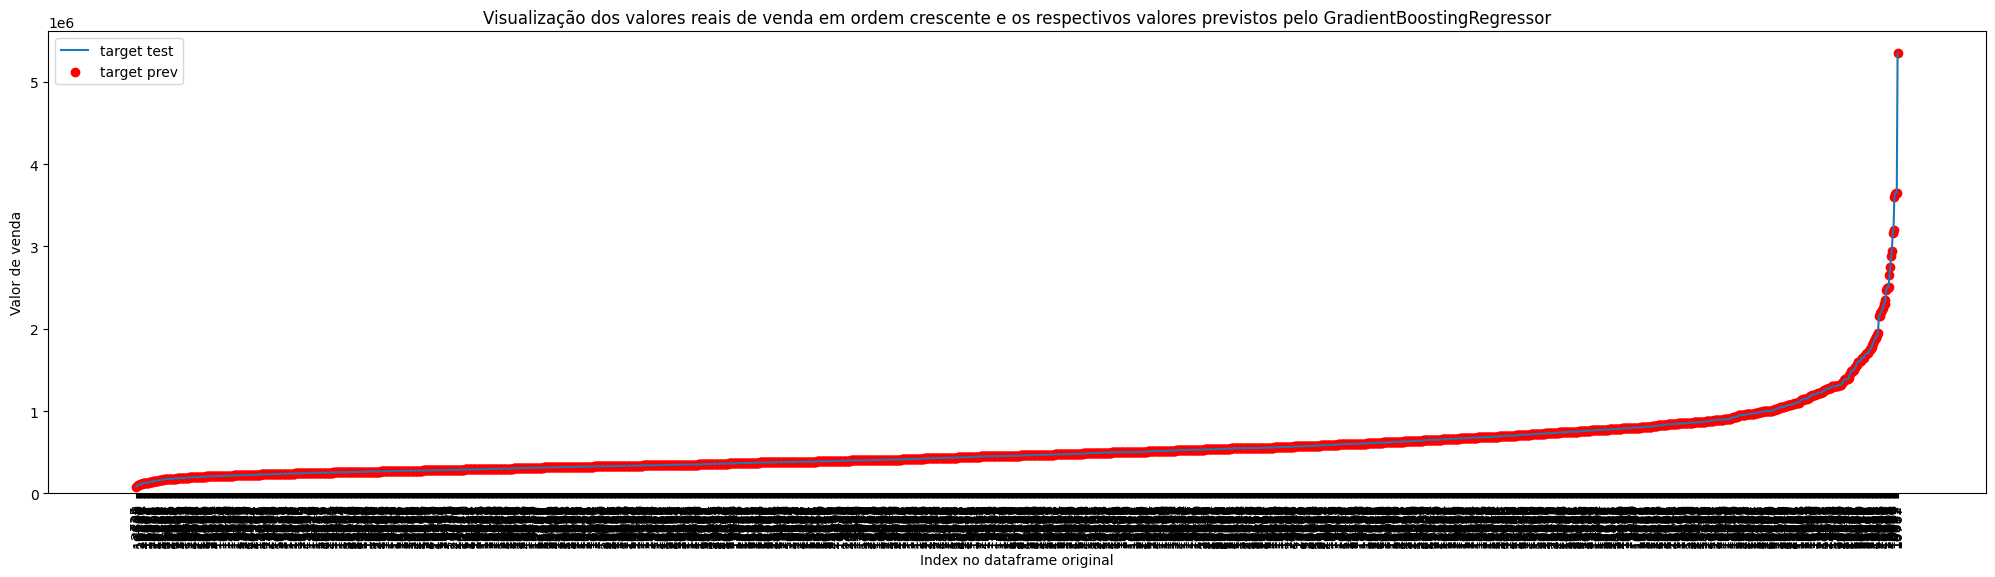

In [42]:
fig = plt.figure(figsize=(25,6))

# Plotar a coluna 'test' como linha e a coluna 'prev' como pontos
plt.plot(dataset_test_prev_sorted.index, dataset_test_prev_sorted['test'], label='target test')
plt.scatter(dataset_test_prev_sorted.index, dataset_test_prev_sorted['test'], color='red', label='target prev')

plt.legend() # Adicionar legenda
plt.xlabel('Index no dataframe original') # Adiciona label ao eixo x
plt.ylabel('Valor de venda') # Adiciona label ao eixo y
plt.title('Visualização dos valores reais de venda em ordem crescente e os respectivos valores previstos pelo GradientBoostingRegressor') # Adicionar um título ao gráfico
plt.xticks(dataset_test_prev_sorted.index, dataset_test_prev.index, rotation=90) # Definir o índice como rótulos nominais no eixo x
plt.ylim(0) # Definir o limite mínimo do eixo y para 0
plt.show() # Exibir o gráfico

Por se tratar de um modelo de regressão, aplicamos o RMSE, usando como métrica de avaliação, pegando a diferença que previu é o valor certo, tentando minimizar a diferença entre o valor preditivo e o valor real no conjunto de dados.

Foi gerado um gráfico que podemos observar a diferença de gráfico entre cada um

A partir do preço, podemos correlacionar a partir da nota da condição do apartamento (casa) com os valores.